# Labs

## 0. Load libraries

### WARNING!

Install local robin module: `python3 -m pip install -e /Users/david/PycharmProjects/robin`

In [1]:
%load_ext autoreload
%autoreload 2

import shutil

from benchmarks.rm_dynamics import RailwayMarketDynamics

from pathlib import Path

In [2]:
# Config files
supply_config_path = Path("../configs/generator/supply_config.yml")
demand_config_path = Path("../configs/demand/demand.yml")
generator_config_path = Path("../configs/generator/generator_config.yml")

# Save paths
generator_save_path = Path(f'../data/supply_dummy.yml')
supply_save_path = '../configs/gsa_results/'
robin_save_path = '../data/output/robin/'
figures = '../figures/'

# Clean save paths directories
if Path(supply_save_path).exists():
    shutil.rmtree(supply_save_path)
    
Path(supply_save_path).mkdir(parents=True)

if Path(robin_save_path).exists():
    shutil.rmtree(robin_save_path)
    
Path(robin_save_path).mkdir(parents=True)

if Path(figures).exists():
    shutil.rmtree(figures)

Path(figures).mkdir(parents=True)

In [3]:
rmd = RailwayMarketDynamics(supply_config_path=supply_config_path,
                            demand_config_path=demand_config_path,
                            generator_config_path=generator_config_path,
                            generator_save_path=generator_save_path,
                            seed = 21)


Number of service requests generated: 20


,Number of Services
AVLO,4
IRYO,8
AVE,5
OUIGO,3
Total,20


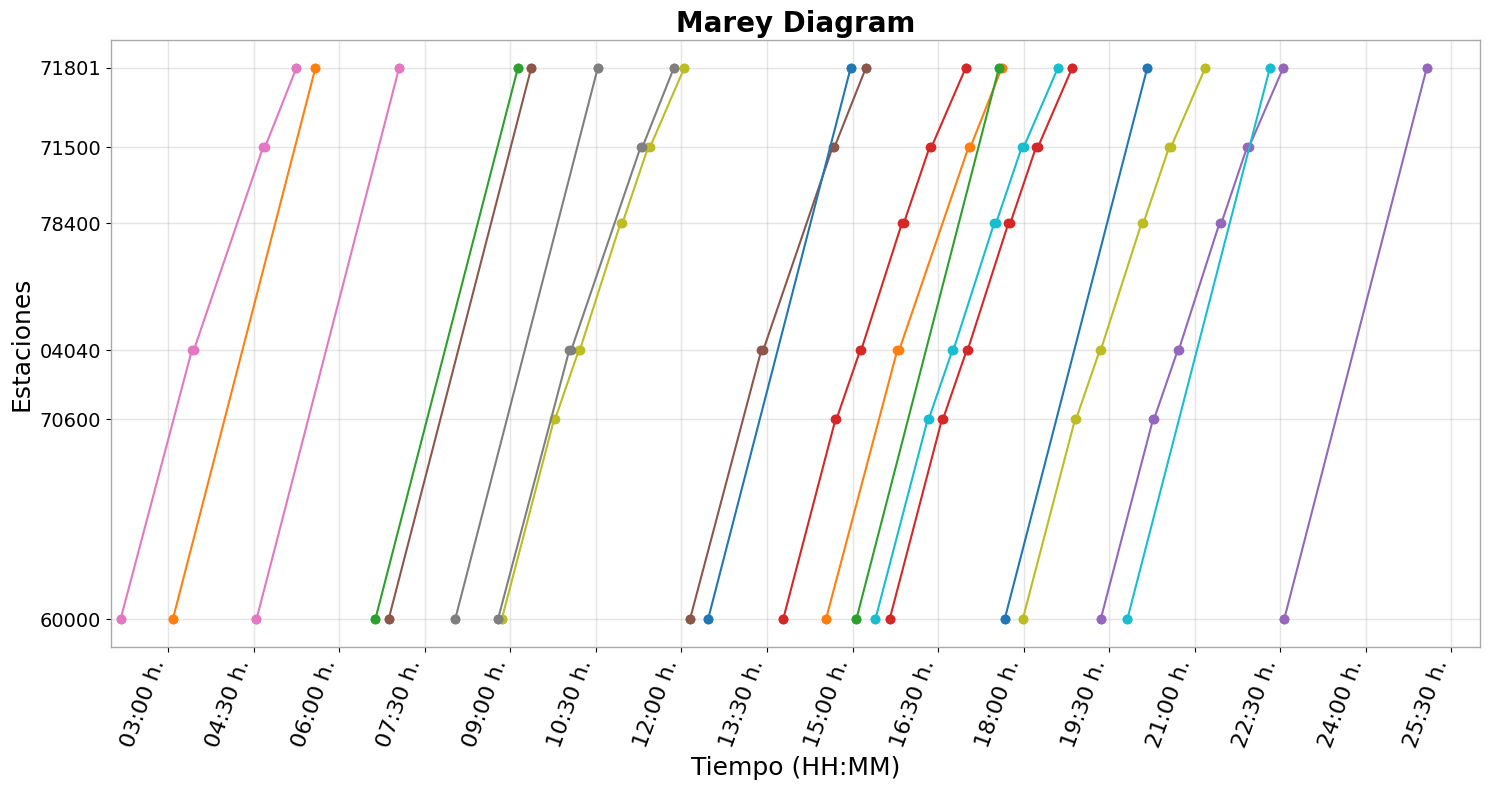

  0%|          | 0/1 [00:00<?, ?it/s]

,Run,Revenue,Execution Time (s.),Scheduled Trains,Delta DT (min.),Delta TT (min.),IRYO,AVLO,AVE,OUIGO
0,1,3045.920517,4.838945,13,8.0,96.0,50.0 %,62.5 %,60.0 %,100.0 %


Global GSA status:
	Total execution time: 4.8389 s.
	Execution Time (by run) - Mean: 4.8389 s. - Std: nan s.
	Revenue - Mean: 3045.9205 - Std: nan
	Scheduled Trains - Mean: 13.0 - Std: nan
	Median solution: Run 1
	Max Revenue: 4559.5 - WARNING!: Scheduling all services could not be feasible


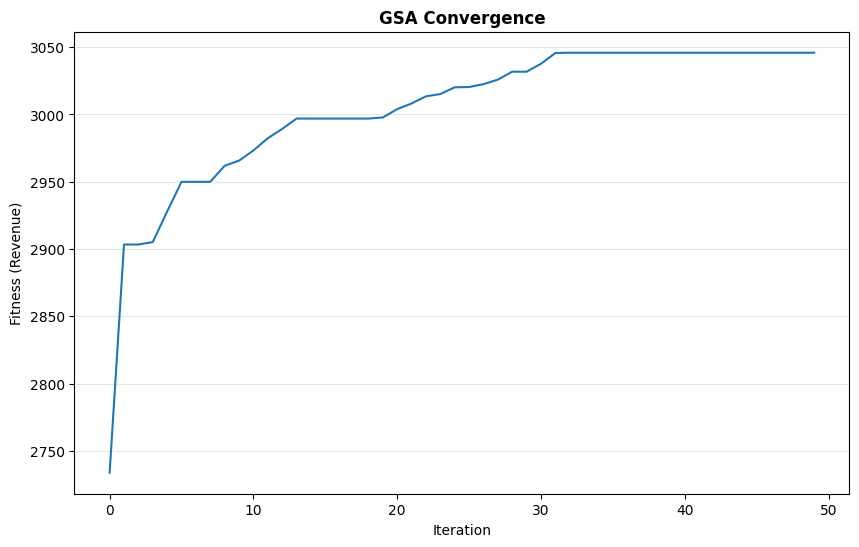

{'1_2024-06-25-14.32': {'60000': [870.0, 870.0], '04040': [945.0, 949.0], '71500': [1022.0, 1026.0], '71801': [1059.0, 1059.0]}, '3_2024-06-25-13.47': {'60000': [826.0, 826.0], '70600': [881.0, 883.0], '04040': [908.0, 909.0], '78400': [952.0, 954.0], '71500': [981.0, 988.0], '71801': [1024.0, 1024.0]}, '4_2024-06-25-22.34': {'60000': [1354.0, 1354.0], '71801': [1504.0, 1504.0]}, '5_2024-06-25-12.09': {'60000': [729.0, 729.0], '04040': [804.0, 809.0], '71500': [882.0, 887.0], '71801': [920.0, 920.0]}, '6_2024-06-25-2.10': {'60000': [130.0, 130.0], '04040': [205.0, 207.0], '71500': [280.0, 282.0], '71801': [315.0, 315.0]}, '8_2024-06-25-8.51': {'60000': [531.0, 531.0], '70600': [586.0, 587.0], '04040': [612.0, 616.0], '78400': [659.0, 665.0], '71500': [692.0, 695.0], '71801': [731.0, 731.0]}, '9_2024-06-25-15.24': {'60000': [924.0, 924.0], '70600': [979.0, 982.0], '04040': [1007.0, 1014.0], '78400': [1057.0, 1060.0], '71500': [1087.0, 1090.0], '71801': [1126.0, 1126.0]}, '11_2024-06-25-

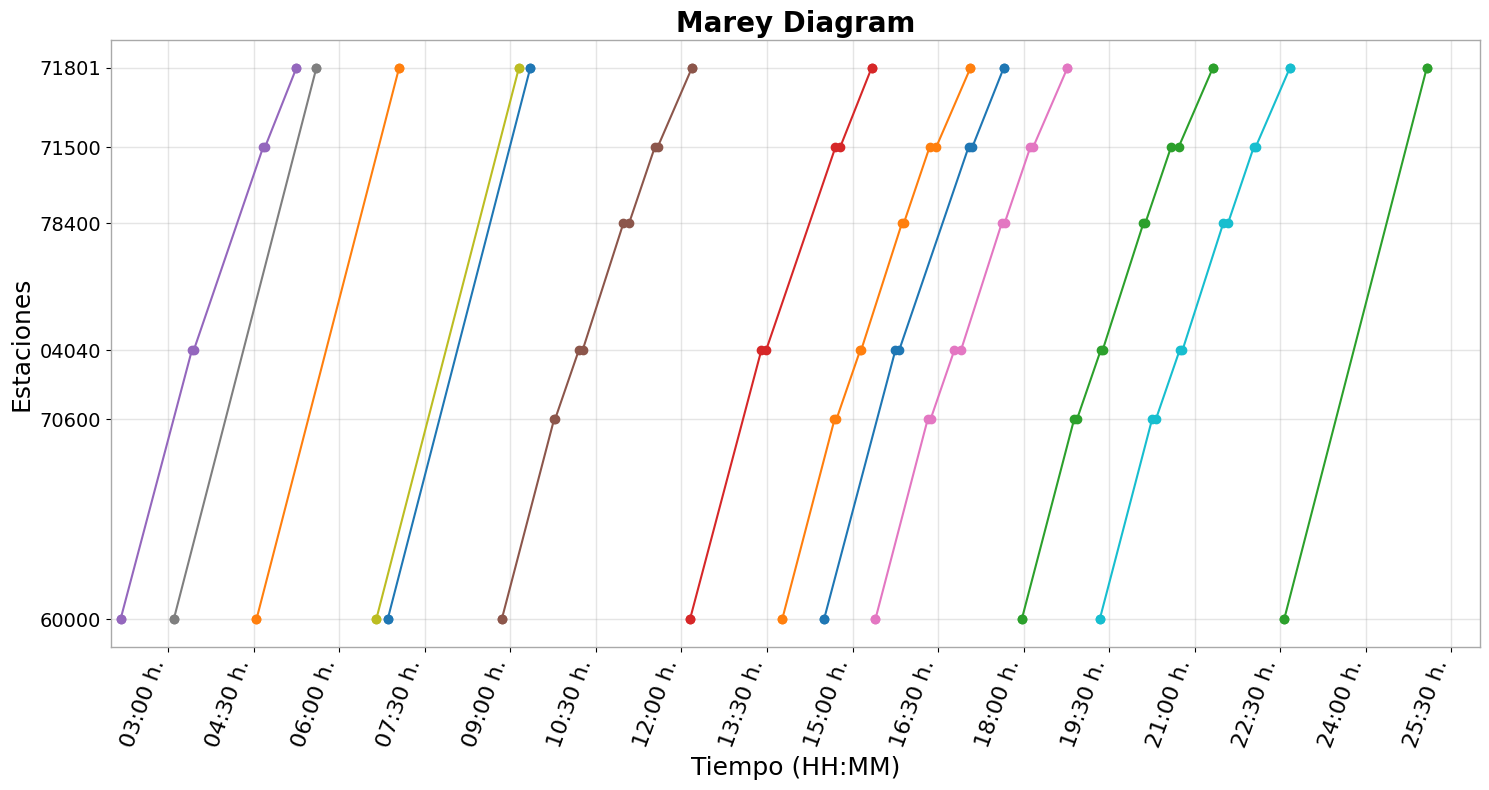

Data from demand plot: 
	Status: User found  any service that met his needs but couldn't purchase. - Passengers: 4012
	Status: User bought a service which was not the one with the best utility. - Passengers: 2643
	Status: User bought the ticket with best utility. - Passengers: 1123
	Status: User didn't find any ticket that met his needs. - Passengers: 0

Data from pie chart: 
	Total tickets sold:  3766
	Percentage of tickets sold by seat type: 
		Seat: Premium - Passengers: 499 - Percentage: 13.25 %
		Seat: Turista - Passengers: 2720 - Percentage: 72.23 %
		Seat: TuristaPlus - Passengers: 547 - Percentage: 14.52 %

Data from plot tickets sold by purchase day: 
	Total tickets sold:  3766
	Tickets sold by purchase date and seat type: 
		Date: 2023-06-11
			Seat: Premium - Number of tickets sold: 56
			Seat: Turista - Number of tickets sold: 63
		Date: 2023-06-12
			Seat: Premium - Number of tickets sold: 5
			Seat: Turista - Number of tickets sold: 57
		Date: 2023-06-13
			Seat: Premium 

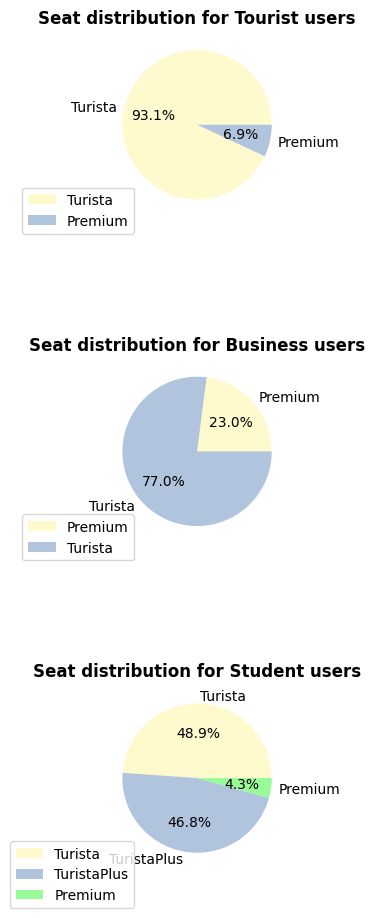

In [4]:
services = rmd.run(gsa_supply_save_path=supply_save_path,
                    robin_save_path=Path(f'{robin_save_path}output.csv'),
                    gsa_population=20,
                    gsa_iters=50,
                    gsa_runs=1,
                    gsa_chaotic=True,
                    gsa_verbosity=False)

In [5]:
!snakeviz profile.pstat

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fuclm%2FPycharmProjects%2FGSA_M%2Fnotebooks%2Fprofile.pstat
^C

Bye!
